# LIF Ensemble

## Import dependencies

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [55]:
from sapicore.engine.ensemble.spiking import LIFEnsemble
from sapicore.utils.plotting import spike_raster
from sapicore.utils.sweep import Sweep

In [56]:
# Uncomment the following line if sapinet is not already installed in your current environment
# %pip install git+https://github.com/cplab/sapinet2.git


## Define experiment specific variables

In [57]:
steps = 200


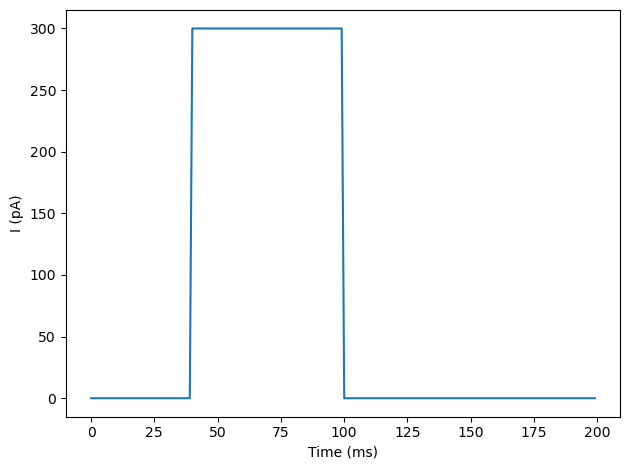

In [58]:
I = torch.ones(steps) * 300
I[int(steps/2):] = 0
I[:int(steps/5)] = 0

plt.subplots(1)
plt.plot(range(steps), I)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()


## Let's create an ensemble of 10 neurons with heterogeneously initialized parameters

In [59]:
num_units = 10
spiking_ensemble = LIFEnsemble(num_units=num_units)

params = {
    "random":
    {
        'volt_rest': {
            'method': 'uniform',
            'args': [-70.0, 20.0]
        },
        'volt_thresh': {
            'method': 'uniform',
            'args': [-55.0, 40.0]
        },
        'leak_gl': {
            'method': 'uniform',
            'args': [3.0, 7.0]
        },
        'tau_mem': {
            'method': 'uniform',
            'args': [3.0, 7.0]
        },
        'tau_ref': {
            'method': 'uniform',
            'args': [1.0, 3.0]
        },
    }
}
sweep = Sweep(params, num_combinations=num_units)

sweep.heterogenize(spiking_ensemble)


In [60]:
print(
    spiking_ensemble.num_units,
    spiking_ensemble.volt_rest,
    spiking_ensemble.volt_thresh,
    spiking_ensemble.leak_gl,
    spiking_ensemble.tau_mem,
    spiking_ensemble.tau_ref,
)


10 tensor([-57.3350, -68.7652, -61.4673, -66.4818, -64.5102, -52.5142, -52.2923,
        -51.1045, -64.5254, -51.8123]) tensor([-23.3153, -53.4288, -20.3160, -17.2748, -40.3067, -53.6150, -29.7308,
        -52.7085, -16.2644, -34.5855]) tensor([6.9712, 8.6591, 9.3917, 6.4539, 4.1166, 4.4452, 8.3507, 8.2668, 5.1558,
        9.7455]) tensor([5.5185, 3.6495, 6.5835, 7.7193, 6.3378, 6.2447, 5.3467, 8.1002, 9.3227,
        6.4840]) tensor([3.7665, 2.5870, 3.2380, 2.8241, 1.1797, 3.9802, 2.0717, 3.0665, 1.4568,
        2.9080])


In [61]:
output = [spiking_ensemble.forward(I[i]) for i in range(steps)]
print(output[0])


{'input': tensor([0.]), 'voltage': tensor([-72.0723, -73.5058, -73.0930, -73.9650, -73.4688, -71.6727, -71.1265,
        -72.2249, -73.9346, -71.6860]), 'spiked': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)}


## Plotting membrane voltage

In [62]:
volt_mem = [output[i].get('voltage') for i in range(steps)]
volt_mem = torch.stack(volt_mem)
volt_mem.shape


torch.Size([200, 10])

In [63]:
# Let's turn our Tutorial 1 plot of the voltage membrane into its own function for ease of use
def plot_voltage(voltage_data, simulation_steps):
    plt.subplots()
    plt.plot(range(simulation_steps), voltage_data)
    plt.xlabel('Time (ms)')
    plt.ylabel('V (mV)')
    plt.tight_layout()
    plt.show()


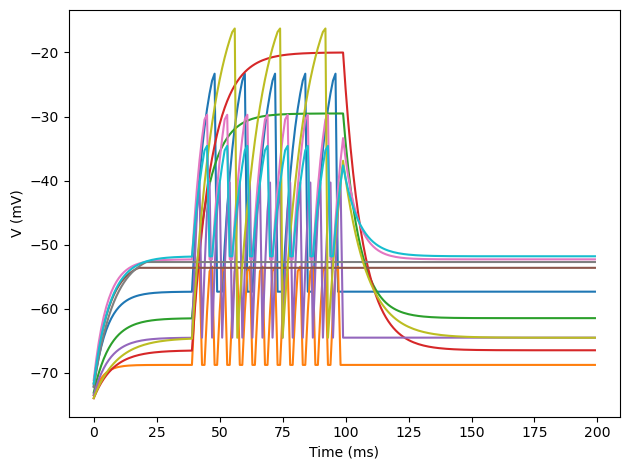

In [64]:
plot_voltage(volt_mem, steps)


In [65]:
spikes = [output[i].get('spiked') for i in range(steps)]
spikes = torch.stack(spikes)
spikes.shape


torch.Size([200, 10])

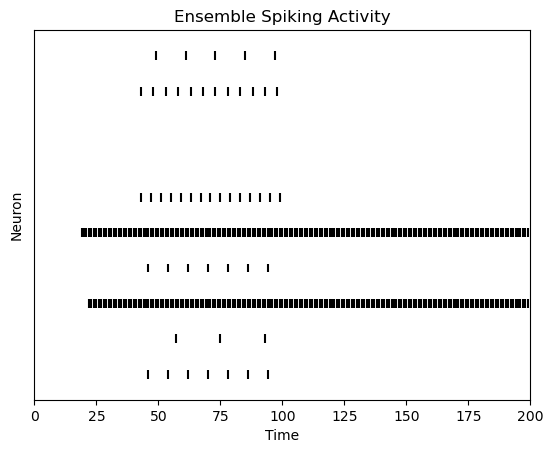

In [66]:
spike_raster(spikes)
